## Perspectief 1

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go


link to dataset3: https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle

In [2]:
df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns', None)
df = df.rename(columns={'Outcome': 'diabetes'})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df2 = pd.read_csv("diabetes_prediction_dataset.csv")
pd.set_option('display.max_columns', None)

In [14]:
df3 = pd.read_csv("ss.csv")
df3['BMI Category'] = df3['BMI Category'].replace('Normal Weight', 'Normal')

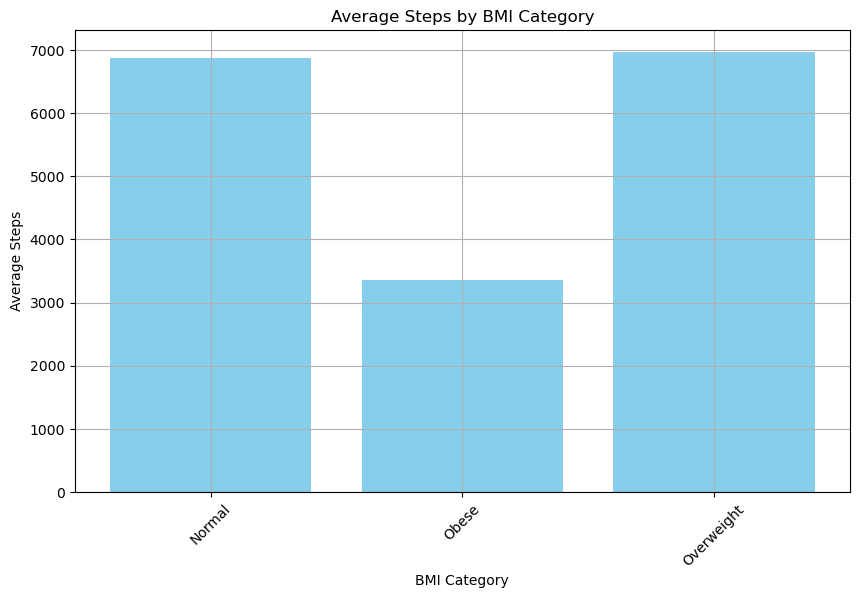

In [5]:
steps_by_bmi = df3.groupby('BMI Category')['Daily Steps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Daily Steps'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Average Steps')
plt.title('Average Steps by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

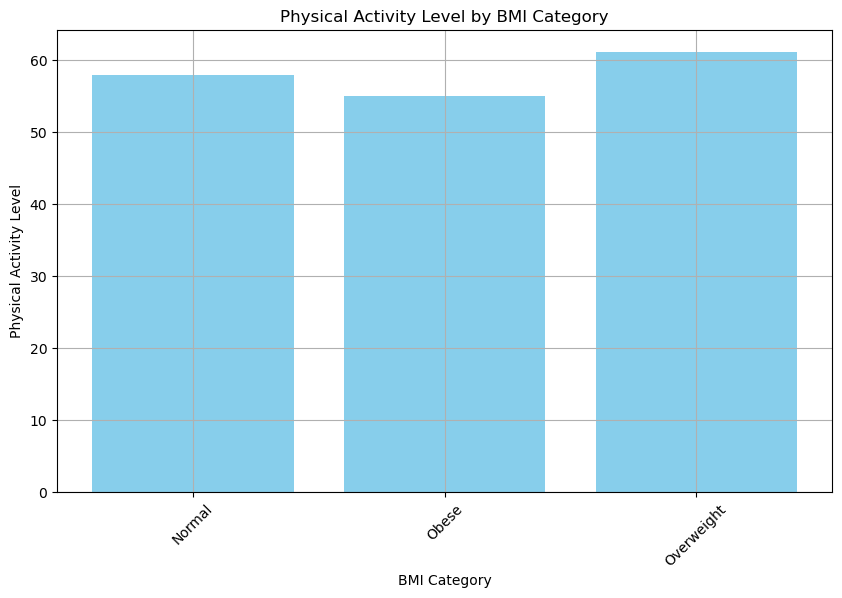

In [6]:
steps_by_bmi = df3.groupby('BMI Category')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
def convert_bp_to_average(bp):
    systolic, diastolic = map(int, bp.split('/'))
    return (systolic + diastolic) / 2

# Apply the function to the 'Blood Pressure' column
df3['Average Blood Pressure'] = df3['Blood Pressure'].apply(convert_bp_to_average)
df3

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Average Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,104.5
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,102.5
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,102.5
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,115.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5


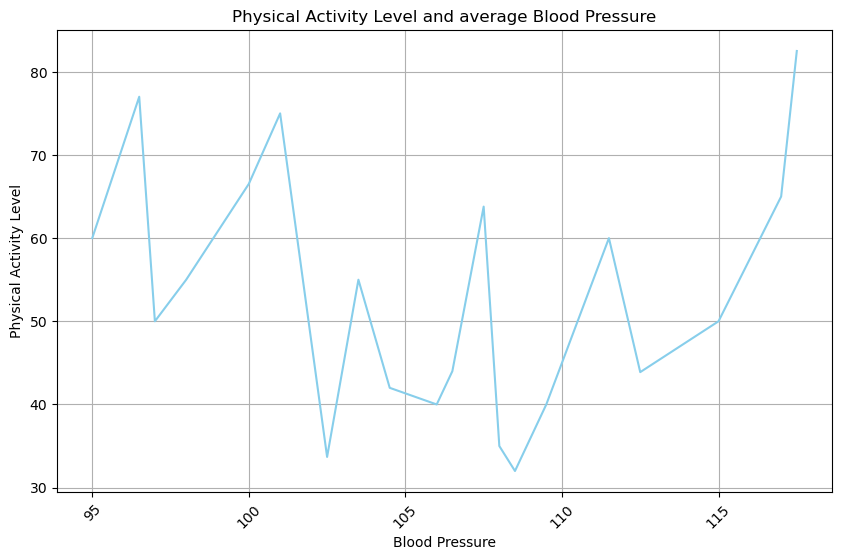

In [8]:
steps_by_bmi = df3.groupby('Average Blood Pressure')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(steps_by_bmi['Average Blood Pressure'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('Blood Pressure')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level and average Blood Pressure')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

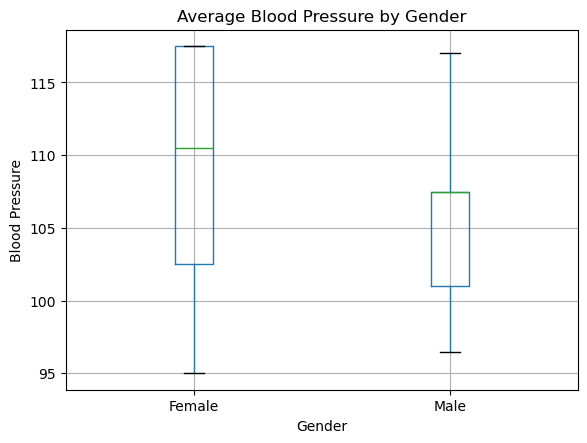

In [13]:
# Create box plot
plt.figure(figsize=(10, 6))
df3.boxplot(column='Average Blood Pressure', by='Gender')
plt.title('Average Blood Pressure by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

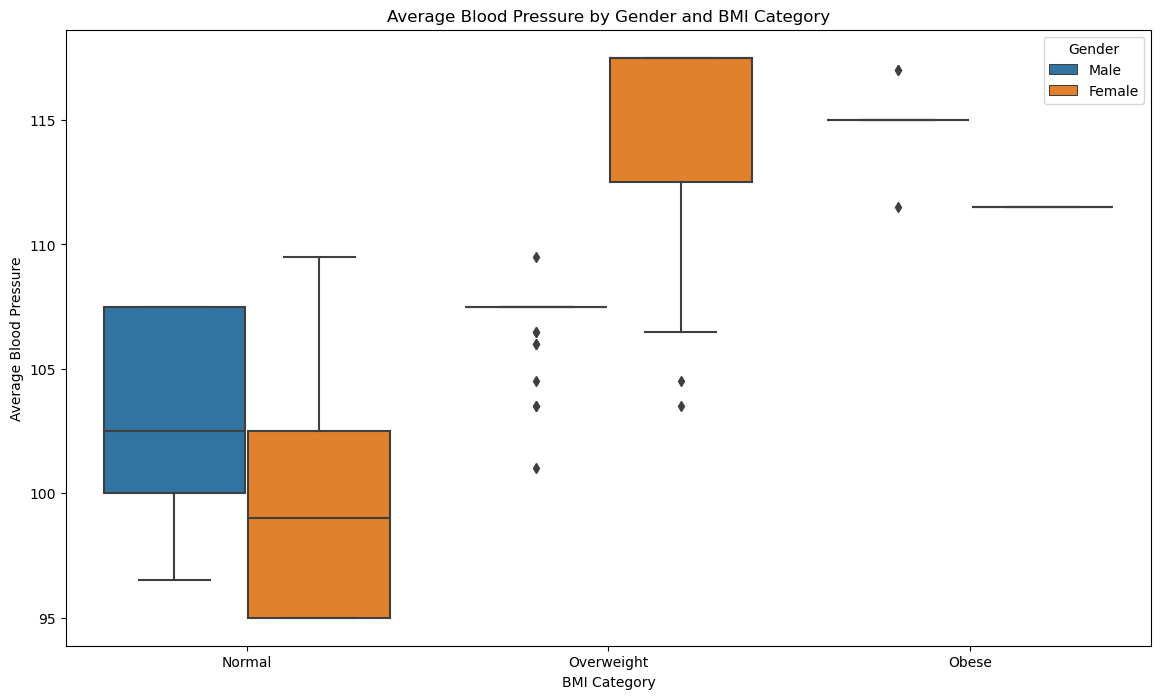

In [10]:
bmi_order = ['Normal', 'Overweight', 'Obese']

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='BMI Category', y='Average Blood Pressure', hue='Gender', data=df3, order=bmi_order)
ax.set_title('Average Blood Pressure by Gender and BMI Category')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Average Blood Pressure')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Observations

There is quite a strong correlation betweeen obesity and blood pressure. The mean blood pressure clearly rises with every BMI Category. It is however a bit unclear what the boxplot looks like in the overwight and obese categories. It seems that females usually have a lower blood pressure than men.

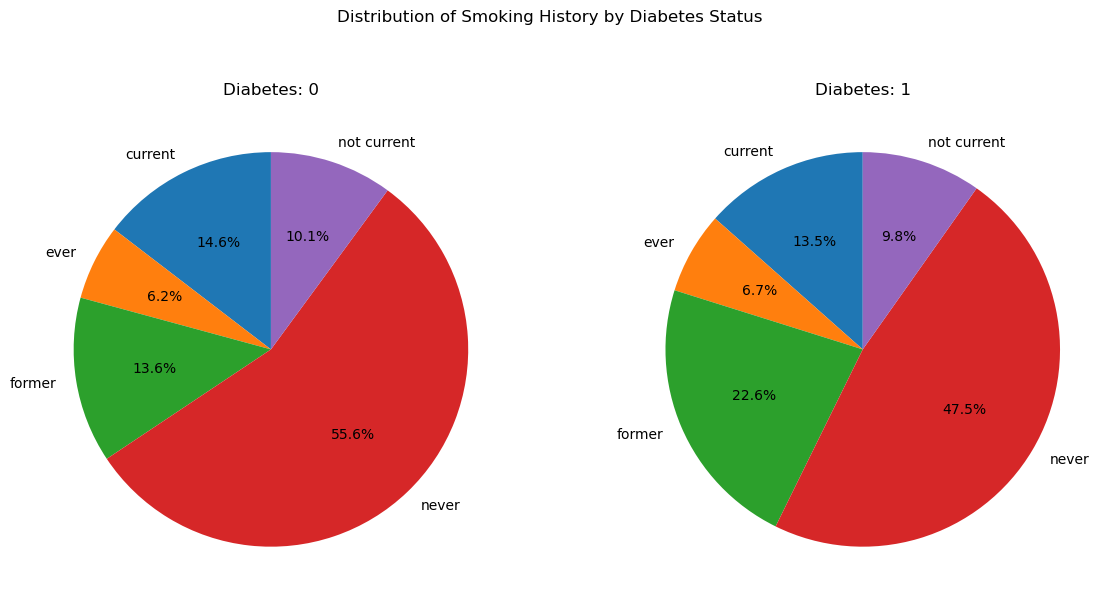

In [11]:
df2 = df2[df2['smoking_history'] != 'No Info']
diabetes_smoking_summary = df2.groupby(['diabetes', 'smoking_history']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, diabetes_category in enumerate(diabetes_smoking_summary.index):
    axes[i].pie(diabetes_smoking_summary.loc[diabetes_category],
                labels=diabetes_smoking_summary.columns,
                autopct='%1.1f%%',
                startangle=90)
    axes[i].set_title(f'Diabetes: {diabetes_category}')

plt.suptitle('Distribution of Smoking History by Diabetes Status')
plt.show()

# Observations

This data was filtered so the unknown were not put in the pie chart, which may lead to misrepresentation. 

The people with diabetes are more likely to have been smokers. However we haven't discovered why this is the case.

## Glucose Waarden

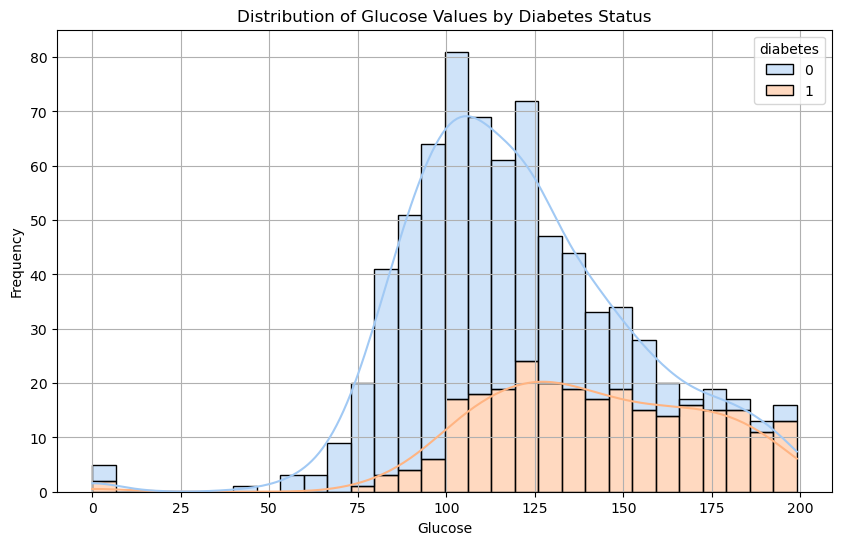

In [12]:
import warnings

warnings.filterwarnings('ignore')

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(subset=['Glucose', 'diabetes'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='diabetes', bins=30, kde=True, palette='pastel', multiple='stack')
plt.title('Distribution of Glucose Values by Diabetes Status')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Obervations

It is clear that the higher the glucose level the higher the percentage of those people have diabetes. Which is to be expected since they have a strong correlation.